In [1]:
import pandas as pd
df = pd.read_pickle('MVOE_catalog.pkl')


In [2]:
print(df.columns)

Index(['path', 'filetime', 'sfile', 'num_traces', 'Fs', 'calib', 'subclass',
       'new_subclass', 'quality', 'weight', 'checked', 'split', 'delete',
       'ignore', 'D', 'R', 'r', 'e', 'l', 'h', 't', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'peaktime', 'peakA', 'peakamp', 'energy',
       'signal_level', 'noise_level', 'snr', 'peakF', 'medianF',
       'bandratio_[0.8_4.0_16.0]', 'bandratio_[1.0_6.0_11.0]', 'bw_max',
       'bw_min', 'sample_min', 'sample_max', 'sample_mean', 'sample_rms',
       'sample_stdev', 'sample_lower_quartile', 'sample_median',
       'sample_upper_quartile', 'kurtosis', 'skewness', 'num_gaps',
       'percent_availability', 'trigger_duration', 'ontime', 'offtime',
       'cft_peak_wmean', 'cft_std_wmean', 'coincidence_sum',
       'detection_quality'],
      dtype='object')


In [28]:
from obspy.core import UTCDateTime
df['utcdatetime'] = [UTCDateTime(row['filetime']) for i,row in df.iterrows()]
df['datetime'] = [row['utcdatetime'].datetime for i,row in df.iterrows()]
df['date'] = [row['utcdatetime'].date for i,row in df.iterrows()]

<AxesSubplot:>

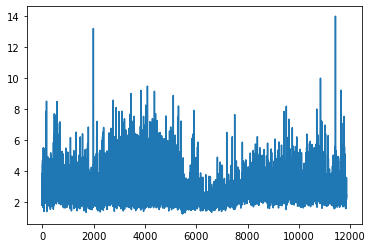

In [23]:
df.set_index('datetime')
df['snr'].plot(x='datetime')

   subclass  count
0         1      2
1         2     12
2         3     28
3         M      8
4         R      2
5         U     14
6         V      1
7         e    325
8         g    238
9         h   8156
10        l    385
11        n      1
12        r   2189
13        t    190
14        u    305


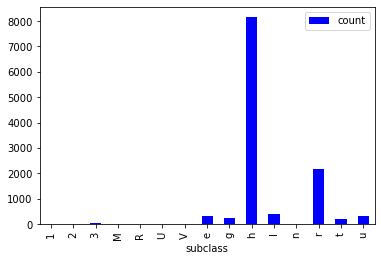

In [33]:
#df['weekday_num'] = pd.DatetimeIndex(df['date_of_birth']).weekday
#df['weekday_name'] = pd.DatetimeIndex(df['date_of_birth']).weekday_name
df_grouped = (df.groupby(['subclass']).size().reset_index(name="count"))
print(df_grouped)
df_grouped.plot.bar(x="subclass", y="count", color='blue');

           date subclass  count
0    1996-10-23        e      1
1    1996-10-23        r      5
2    1996-10-24        e      1
3    1996-10-24        h     14
4    1996-10-24        l      1
..          ...      ...    ...
489  1997-02-25        r      9
490  1997-02-26        h    119
491  1997-02-26        r     39
492  1997-02-27        h      4
493  1997-02-27        r      6

[494 rows x 3 columns]


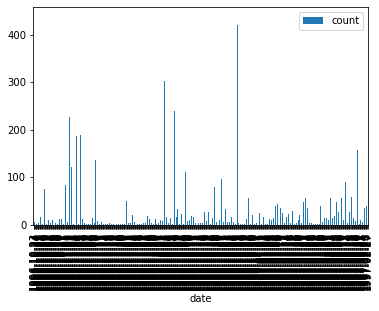

In [45]:
df_grouped = (df.groupby(['date', 'subclass']).size().reset_index(name="count"))
print(df_grouped)
df_grouped.plot.bar(x="date", y="count");


In [44]:
df2 = df.groupby(['date', 'subclass']).count().unstack('subclass').fillna(0)
df2  = df2[['r','e','l','h','t']]
#df2[['date','subclass']].plot(kind='bar', stacked=True)
print(df2)
#df2.plot(kind='bar',  stacked=True)

              r                                                 ...    t       \
subclass      1    2    3    M    R    U    V    e    g      h  ...    U    V   
date                                                            ...             
1996-10-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0    0.0  ...  0.0  0.0   
1996-10-24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   14.0  ...  0.0  0.0   
1996-10-25  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0   29.0  ...  0.0  0.0   
1996-10-26  0.0  1.0  0.0  1.0  0.0  7.0  0.0  2.0  0.0   75.0  ...  7.0  0.0   
1996-10-27  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   12.0  ...  1.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...    ...  ...  ...  ...   
1997-02-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   91.0  ...  0.0  0.0   
1997-02-24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    8.0  ...  0.0  0.0   
1997-02-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   34.0  ...  0.0  0.0   
1997-02-26  0.0  0.0  0.0  0

                       r
date       subclass     
1996-10-23 e           1
           r           5
1996-10-24 e           1
           h          14
           l           1
...                  ...
1997-02-25 r           9
1997-02-26 h         119
           r          39
1997-02-27 h           4
           r           6

[494 rows x 1 columns]


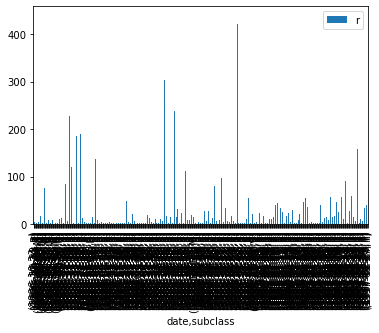

In [49]:
df_grouped = (df.groupby(['date', 'subclass']).count())
df_grouped  = df_grouped[['r']]
print(df_grouped)
df_grouped.plot.bar(stacked=True);

(array([ 9801.,  9815.,  9831.,  9845.,  9862.,  9876.,  9893.,  9907.,
         9921.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

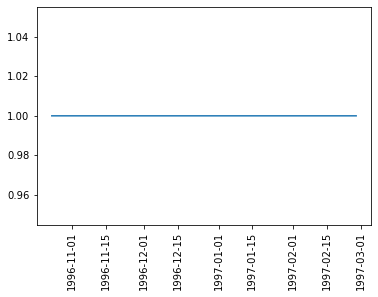

In [21]:
import matplotlib.pyplot as plt
time_series = pd.DataFrame(df['datetime'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series = time_series.sort_values('date', ascending=True)
plt.plot(time_series['date'], time_series['count'])
plt.xticks(rotation='vertical')

In [5]:
isinstance(df.iloc[0].filetime, str)

True

In [7]:
df.iloc[0].filetime

'1996-10-23T16:08:00.040000Z'